# Simple Linear Regression Model from Scratch

## Importing Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


## Specify file path of dataset

In [ ]:
filepath = "/content/Salary_Data.csv"


## Importing data

In [ ]:
df = pd.read_csv(filepath)

x = df.iloc[:,0].values
y = df.iloc[:,1].values

## Splitting data for training and testing

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.2, random_state = 42)


## Linear Regression Class

In [ ]:
class LinearRegression():

    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.B = 0
        self.c = 0
    
    def get_mean(self):
        return np.mean(self.X),np.mean(self.Y)

    def fit(self):
        numerator, denominator = 0,0
        x_mean,y_mean = self.get_mean()
        for i in range(len(self.X)):
            numerator += ((self.X[i])-(x_mean))*((self.Y[i])-(y_mean))
            denominator += ((self.X[i])-(x_mean))**2
        self.B = numerator/denominator
        self.c = y_mean - (self.B*x_mean)
    
    def predict(self,xtest,ytest):
        plt.scatter(xtest,ytest,color = 'red')
        plt.plot(xtest,(self.B*xtest)+self.c,color = 'green')
        plt.show()
    
    def plot(self):
        plt.scatter(self.X,self.Y,color = 'red')
        plt.plot(self.X,(self.B*self.X)+self.c,color = 'green')
        plt.show()
        
    def calculate_accuracy(self,x,y):
        x_mean,y_mean = self.get_mean()
        ss_t = 0
        ss_r = 0
        for i in range(len(x)):
            y_pred = (self.B*x[i]) + self.c
            ss_t += (y[i] - y_mean) ** 2
            ss_r += (y[i] - y_pred) ** 2
        r2 = 1 - (ss_r/ss_t)
        return r2
    

## Using the Class

In [ ]:
#instantiate object of class with training data
lr = LinearRegression(Xtrain,Ytrain)

In [ ]:
#calculate missing parameters of the equation y = b0*x + b1
lr.fit()

In [ ]:
#get the mean calculated in the process
lr.get_mean()

(5.1875, 74207.625)

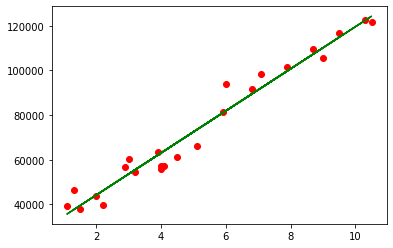

In [ ]:
#plot the training data and line of the calculated equation
lr.plot()

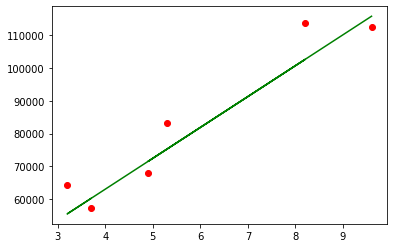

In [ ]:
#plot the test data and line of the calculated equation
lr.predict(Xtest,Ytest)

In [ ]:
#calculate accuracy using r^2 method of training data
lr.calculate_accuracy(Xtrain,Ytrain)

0.9645401573418146

In [ ]:
#calculate accuracy using r^2 method of training data
lr.calculate_accuracy(Xtest,Ytest)

0.9157393256196166